# Project description

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.


# Instructions for completing the project

**Step 1. Open the data file and study the general information**

File path:
/datasets/games.csv

**Step 2. Prepare the data**

* Replace the column names (make them lowercase).
* Convert the data to the required types.
* Describe the columns where the data types have been changed and why.
* If necessary, decide how to deal with missing values:
    * Explain why you filled in the missing values as you did or why you decided to leave them blank.
    * Why do you think the values are missing? Give possible reasons.
    * Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
* Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

**Step 3. Analyze the data**

* Look at how many games were released in different years. Is the data for every period significant?
* Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
* Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
* Work only with the data that you've decided is relevant. Disregard the data for previous years.
* Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
* Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
* Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
* Keeping your conclusions in mind, compare the sales of the same games on other platforms.
* Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

**Step 4. Create a user profile for each region**

For each region (NA, EU, JP), determine:
* The top five platforms. Describe variations in their market shares from region to region.
* The top five genres. Explain the difference.
* Do ESRB ratings affect sales in individual regions?

**Step 5. Test the following hypotheses:**


1. Average user ratings of the Xbox One and PC platforms are the same.

2. Average user ratings for the Action and Sports genres are different.


Set the alpha threshold value yourself.

Explain:

* How you formulated the null and alternative hypotheses

* What significance level you chose to test the hypotheses, and why

**Step 6. Write a general conclusion**

Format: Complete the task in the Jupyter Notebook. Insert the programming code in the code cells and text explanations in the markdown cells. Apply formatting and add headings.


**Data description**
* `Name`
* `Platform`
* `Year_of_Release`
* `Genre`
* `NA_sales` (North American sales in USD million)
* `EU_sales` (sales in Europe in USD million)
* `JP_sales` (sales in Japan in USD million)
* `Other_sales` (sales in other countries in USD million)
* `Critic_Score` (maximum of 100)
* `User_Score` (maximum of 10)
* `Rating` (ESRB)


Data for 2016 may be incomplete.

## Initialization

Let's import all libraries and our raw data from `'/datasets/games.csv'` as `games`.

### Import libraries

In [1]:
from scipy import stats as st
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from functools import reduce
import seaborn as sb
from scipy import stats

### Import data

In [2]:
try:
    games=pd.read_csv('games.csv')
    
except:
    games=pd.read_csv('/datasets/games.csv')

##  Prepare the data

Let's investigate our raw by printing the first 10 raws by `.head()`, the general information by `.info()` and the data structure by `.shape()`.

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

print('')
print('The presented dataset has', games.shape[0],'rows and', games.shape[1],'columns.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

The presented dataset has 16715 rows and 11 columns.


As mentioned in the introduction, the data includes the following columns:
* `Name` - the name of games
* `Platform`
* `Year_of_Release`
* `Genre`
* `NA_sales` (North American sales in USD million)
* `EU_sales` (sales in Europe in USD million)
* `JP_sales` (sales in Japan in USD million)
* `Other_sales` (sales in other countries in USD million)
* `Critic_Score` (maximum of 100)
* `User_Score` (maximum of 10)
* `Rating` (ESRB)

In addition, we ca see that:
* We have missing values in the following columns - `Platform`, `Critic_Score`, `User_score` and `Rating`. We will try to fill them in the next steps.
* The column names have buppercase. We will change them to lowercase.
* The column type in `Year_of_release` is `float64`. We will change it to a `datetime` type. And the type of `User_Score` is `object`. Then, we will change in to `float`.


In addtion, after preparing all data, we will add a new column named `total_sales` which will sum all region sales in USD millions.

### Convert the column names

In this step, we will convert the the columns into lowercase by `.str.lower()` so the work with the data will be more confortable.

In [5]:
games.columns = games.columns.str.lower()

In [6]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Convert the data

In the next steps, we will treat the missing (first searching them by using `.isna().sum()`) and then convert the variables type according to the desired type.

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

So, the columns that we need to fill the missing values are and convert the variables types are:
* `name` - only fill the missing values.
* `year_of release` - fill the miising values and changing to datetime type.
* `critic_score` - only fill the missing values.
* `user_score` - fill the missing values and convert the variable type to `float`.
* `rating` - only fill the missing values.

#### `name`

Let's investigate the `name` column by printing the values count by `.value_counts()` and the unique values by `.unique()` of this column.

In [9]:
games['name'].value_counts()

Need for Speed: Most Wanted             12
FIFA 14                                  9
LEGO Marvel Super Heroes                 9
Ratatouille                              9
Madden NFL 07                            9
                                        ..
SingStar Rocks!                          1
Super Street Fighter IV: 3D Edition      1
Kowloon's Gate                           1
Phoenix Wright: Ace Attorney Trilogy     1
Storybook Workshop                       1
Name: name, Length: 11559, dtype: int64

In [10]:
games['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

We have 11559 unique values for the `name` column. Now, let's check the rows that have missing values in this column. 

In [11]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


We have only 2 missing values in this row that the main caraterisrics are `GEN` in `platform` and `1993` in `year_of_release`. Let's try t filter our table and find a comman game name for those parameters.

In [12]:
games.query('year_of_release == 1993'and'platform == "GEN"' )

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
588,Streets of Rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,1994.0,Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
996,Sonic the Hedgehog 3,GEN,1994.0,Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
1365,Disney's The Lion King,GEN,1994.0,Platform,0.97,0.37,0.03,0.05,NaN,NaN,NaN


In [13]:
len(games[games['name'].isna()])/len(games['name'])*100

0.011965300628178284

Because those missing values are only 0.1% from all data, it won't influence our analysis. So we will leave it as it is but loc it so it won't come back as a missing value.

In [14]:
games['name']=games['name'].fillna('unknown')

In [15]:
games['name'].isna().sum()

0

Now, we have 0 missing values in the `name` column and we can proceed to the next row `year_of release`. 

#### `year_of_release`    

Let's investigate the `year_of release` column by printing the values count by `.value_counts()`, the unique values by `.unique()` and the satistical destribution of the variables by `.describe()`of this column.

In [16]:
games['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [17]:
games['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [18]:
games['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

We have 16444 variables when the minimun year is 1980 and the maximun year is 2016. The average year is 2006 and the most commun is 2007. Now let's search for the missing values by the sames method used in previous step.

In [19]:
games['year_of_release'].isna().sum()

269

In [20]:
len(games[games['year_of_release'].isna()])/len(games['year_of_release'])*100

1.609332934489979

In [21]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


We have 269 missing values which is 1.6% of the whole data. We will try to fill them according to the same game's name (which can not be more specific than that) and the most commun year using `.transform()` and `.grp.mode().max()`.

In [22]:
games['year_of_release']=games.groupby('name')['year_of_release'].transform(lambda grp: grp.fillna(grp.mode().max()))

In [23]:
games['year_of_release'].isna().sum()

146

Even though we try to fill the missing values, we still have 146 missing values. Let's investigate them more by filtering the rest of those missing values.

In [24]:
games[games['year_of_release'].isna()]['name'].unique()

array(['wwe Smackdown vs. Raw 2006', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog", 'Triple Play 99',
       'Adventure', 'Combat', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Yakuza 4', 'WarioWare: Twisted!', 'Test Drive Unlimited 2',
       'Monster Hunter 2', 'Advance Wars: Days of Ruin', 'Fishing Derby',
       'Karate', 'Circus Atari',
       'The Chronicles of Riddick: Escape from Butcher Bay',
       "Maze Craze: A Game of Cops 'n Robbers", 'Silent Hill: Homecoming',
       'Super Breakout', "Robert Ludlum's The Bourne Conspiracy",
       'NHL Slapshot', 'TERA', 'NFL GameDay 2003',
       'Harvest Moon: Save the Homeland', 'Hangman',
       "Cubix Robots for Everyone: Clash 'n' Bash",
       'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)', 'Dragster',
       'All-Star Baseball 2005', 'Slot Machine',
       'The Dukes of Hazzard II: Daisy Dukes It Out',
       'Haven: Call of the King',
       'Unreal Ch

In [25]:
len(games[games['year_of_release'].isna()])/len(games['year_of_release'])*100

0.8734669458570146

There are some game names that include the year of release in their name but those missing values represent less than 1% and it could be due to the fact there are some games which could be release in several years. So we won't fill them with anything. But we will convert the variables type to a float to make it easier to analyse it in future steps.

In [26]:
games['year_of_release'] = games['year_of_release'].astype(float)

In [27]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16569 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


So now, the `year_of _release` column has no missing values and the rest of the variables are convert to ta float, we can continue to the next column `critic_score`.

#### `critic_score`

Using the same method as used in previus column, we will investigate the `critic_score` column.

In [28]:
games['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [29]:
games['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [30]:
games['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

We have 81 unique values for the critic score when the minimun is 13 and the maximun is 98 out of 100. The average is 68 and the most commun is 71. Let's investigate the missing values of this columns.

In [31]:
games['critic_score'].isna().sum()

8578

In [32]:
len(games[games['critic_score'].isna()])/len(games['critic_score'])*100

51.31917439425665

In [33]:
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


We have 8576 missing values which is 51% of thw whole data!It is a lot! We cannot fill those missing values because the score is a very individual feature. Therefore we will leave it as it is and continue to the next column `user_score`.

#### `user_score`

As previously, let's investigate the `user_score` column by the same methods.

In [34]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [35]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1         2
0.3       2
2.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [36]:
games['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

We have 96 unique values for the user's score. One interestigating variable is `tbd` also known as `to be determined`. Let's look at the data with this value.

In [37]:
games.query('user_score=="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [38]:
games.query('name=="Zumba Fitness"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
669,Zumba Fitness,X360,2010.0,Sports,1.74,0.45,0.0,0.18,42.0,5.5,E
3516,Zumba Fitness,PS3,2010.0,Sports,0.28,0.21,0.0,0.08,NaN,3.8,E


In [39]:
games.query('name=="Namco Museum: 50th Anniversary"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
7304,Namco Museum: 50th Anniversary,GC,2005.0,Misc,0.17,0.04,0.0,0.01,60.0,tbd,E10+
7623,Namco Museum: 50th Anniversary,GBA,2005.0,Misc,0.14,0.05,0.0,0.00,60.0,tbd,E
8191,Namco Museum: 50th Anniversary,XB,2005.0,Misc,0.13,0.04,0.0,0.01,62.0,tbd,E10+


It looks like we can replace the `tbd` value into the most commun user score but there are games with no values for the user's score. So, we will change it to a `NaN` variable by using `.np.nan`

In [40]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

In [41]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

So now that we changed the `tbd` variable, let's invetigate the missing values.

In [42]:
games['user_score'].isna().sum()

9125

In [43]:
len(games[games['user_score'].isna()])/len(games['user_score'])*100

54.59168411606342

In [44]:
games[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


We have 9027 missing values, which is 54% of the whole data. As previously, we cannot fill those missing value because it is an individual feature. Therefor, we will leave it as it is but we will convert the variable type to a float to make our future analysis mch easier.

In [45]:
games['user_score'] = games['user_score'].astype(float)

In [46]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16569 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


#### `rating`

As in previous steps, let's invetigate the `rating` column in the same methods.

In [47]:
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [48]:
games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [49]:
games['rating'].describe()

count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object

We have 9 unique variables with the missing value in this. The most commun rating is `E`. Now let's invetigate the missing values as before.

In [50]:
games['rating'].isna().sum()

6766

In [51]:
len(games[games['rating'].isna()])/len(games['rating'])*100

40.478612025127134

In [52]:
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [53]:
games['rating']=games['rating'].fillna('no info')

We have 6699 missing values which is 40% of the whole data of this raw. We cannot know the rating for games with missing rating so we replaced them with `no info`.In the next setps, we will investigate the corrolation between all missing values in last three columns -  `critic_score`, `user_score` and `rating

### Correlation between missing values

As we found out, we have missing values in `critic_score`, `user_score` and `rating` that we cannot fill so easly. To investigate the correlation between those missing values, we will:
* filter the data which will include only the missing values using `.iloc[]` method
* aggregate the data by year of release and count the  number if unique games for each column into new pivot tables named `missing_critics`, `missing_users` and `missing_rating`.
* merge the new tables by the year of the release into a new data names `all_missing`.
* represnt the data in a graph.
* and displaying the corrolation by `.corr()` between the year of release, critic's score, user's score and the rating.

In [54]:
missing_critics  = (games
                 .loc[games['critic_score'].isna()==True]
                 .pivot_table(index='year_of_release', values='name', aggfunc='count')
                 .reset_index()
                     ).rename(columns={'name':'critic_score'})

missing_users = (games
                .loc[games['user_score'].isna()==True]
                .pivot_table(index='year_of_release', values='name', aggfunc='count')
                .reset_index()
                     ).rename(columns={'name':'user_score'})

missing_rating =(games
                .loc[(games['rating']=='no info')]
                .pivot_table(index='year_of_release', values='name', aggfunc='count')
                .reset_index()
                     ).rename(columns={'name':'rating'})

all_missing = missing_critics.merge(missing_users, on='year_of_release', how='left')

all_missing = all_missing.merge(missing_rating, on='year_of_release', how='left')

all_missing

,year_of_release,critic_score,user_score,rating
0,1980.0,9,9,9
1,1981.0,46,46,46
2,1982.0,36,36,36
3,1983.0,17,17,17
4,1984.0,14,14,14
5,1985.0,13,13,13
6,1986.0,21,21,21
7,1987.0,16,16,16
8,1988.0,14,14,14
9,1989.0,17,17,17


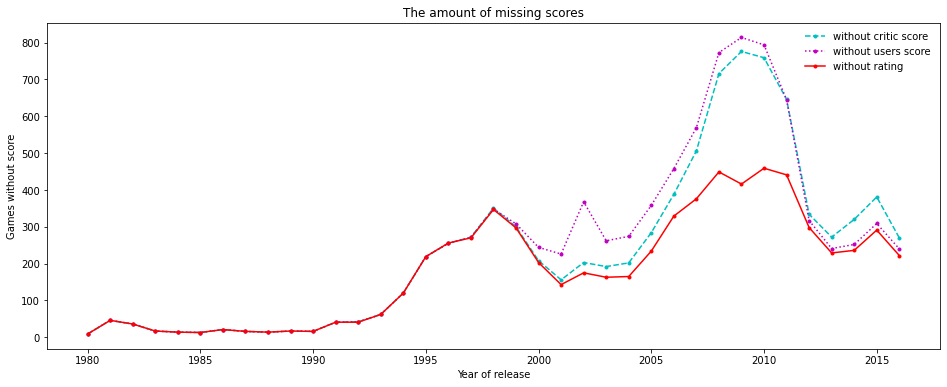

In [55]:
fig, ax = plt.subplots(figsize = (16,6))
ax.set(title='The amount of missing scores',
       xlabel='Year of release', ylabel='Games without score')
ax.plot(missing_critics['year_of_release'], missing_critics['critic_score'], '.--c', label='without critic score')
ax.plot(missing_users['year_of_release'], missing_users['user_score'], '.:m', label='without users score')
ax.plot(missing_rating['year_of_release'], missing_rating['rating'], '.-r', label='without rating')
ax.legend(frameon=False)
plt.show()

We can see that:
* from 1980 to 1998 the distribution of the missing values in the 3 column is the same. It can be due to the fact that up to 1998 there no such interest in rating or publishing the rating of the games.
* From 1998, we see two beghaviors:
    * the missing values in crtic's and user's score act almost the same from 1998 up to 2016.
    * we have less missing values for rating than for the critic's and user's score.

Those two behoavior cpuld be explain by the fact the the early 20th century, the population were starting to be more aware of the ERSB rating ( to which population to game is more suitable than others) or an that fact that not all games tested for scoring.

In [56]:
all_missing[['critic_score','user_score','rating','year_of_release']].corr()

,critic_score,user_score,rating,year_of_release
critic_score,1.000000,0.983063,0.961814,0.770298
user_score,0.983063,1.000000,0.944602,0.744551
rating,0.961814,0.944602,1.000000,0.810313
year_of_release,0.770298,0.744551,0.810313,1.000000


In the corration we see a high positive correlation between missing values and the year of release. That means that the more the game is released in a late year the more he will have missed scores.

From this investigation, we have no way to replace in a good way the missing values. Therefor, we wil just replace them with unreal numbers - for critic's score, as -1 and for user's score, as -2.

In [57]:
games['critic_score']=games['critic_score'].fillna('-1')
games['user_score']=games['user_score'].fillna('-2')

In [58]:
games.isna().sum()

name                 0
platform             0
year_of_release    146
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

Now that the data wad filled, we will creat the new sales column.

### Calculate the total sales 

Let's creat a new column named `total_sales` by `.sum()` from all regions sales - `na_sales`, `eu_sales`, `jp_sales` and `other_sales` in USD millions.

In [59]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [60]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1,-2,no info,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1,-2,no info,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1,-2,no info,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1,-2,no info,28.31


In [61]:
games['total_sales'].describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

From this discription, we see a strange statictical distribution:
* we have games with 0 USd millions in total sales and other with 82.5 USD millions in total sales.
* while the average total sale is 0.5 USd millions which is lower than 0.17 US millions(the most commun total sales). 

We will investigate this behavior in our next steps.

## Analyze the data

Now that the whole data is prepared, we need to answer the following questions:
* How many games were released in different years. Is the data for every period significant?
* How sales varied from platform to platform. 
    * Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
    * Find platforms that used to be popular but now have zero sales. 
    * How long does it generally take for new platforms to appear and old ones to fade?
* Build a prognosis for 2017. Select several potentially profitable platforms and answer the following:
    * Which platforms are leading in sales? 
    * Which ones are growing or shrinking? 
* Build a box plot for the global sales of all games, broken down by platform.
    * Are the differences in sales significant? 
    * What about average sales on various platforms?
* Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
* Compare the sales of the same games on other platforms.
* Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

###  Games per year

* How many games were released in different years?\
To answer this question, we need to creat a new data frame named `total_games_per_year` using pivot table where we aggregate the data by year of release and count the game's name for each year and sort the count fron the high to low.
* Is the data for every period significant?\
To answer this question, we will creat a bar plot disrtibution of the `total_games_per_year` and investigated their finidings.

In [62]:
total_games_per_year = games.pivot_table(index='year_of_release',values='name',aggfunc='count').rename(columns={'name':'number_of_games'}).reset_index()
total_games_per_year

,year_of_release,number_of_games
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


In [63]:
total_games_per_year['number_of_games'].describe()

count      37.000000
mean      447.810811
std       455.839387
min         9.000000
25%        36.000000
50%       339.000000
75%       765.000000
max      1441.000000
Name: number_of_games, dtype: float64

In [64]:
total_games_per_year.sort_values(by='number_of_games',ascending=False).head(5)

,year_of_release,number_of_games
28,2008.0,1441
29,2009.0,1430
30,2010.0,1270
27,2007.0,1202
31,2011.0,1153


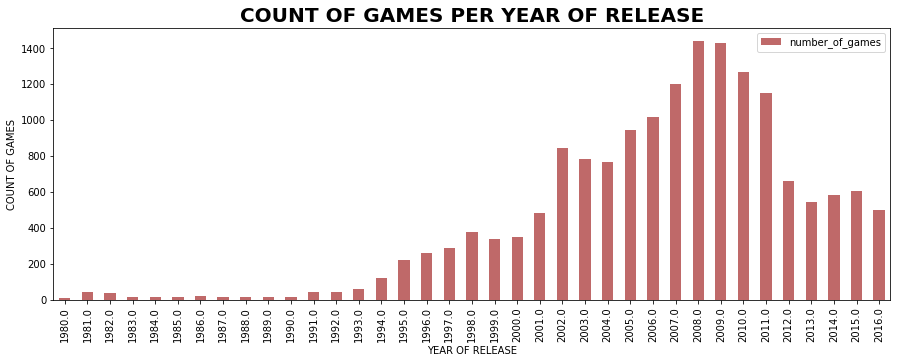

In [65]:
total_games_per_year.plot(kind = 'bar', x = 'year_of_release', y = 'number_of_games',alpha = 0.7,color='brown', legend = True, figsize = (15,5))
plt.title('COUNT OF GAMES PER YEAR OF RELEASE', size=20, weight='bold')
plt.xlabel('YEAR OF RELEASE')
plt.ylabel('COUNT OF GAMES')
plt.show()

For this distrinution we can condule that:
* untill 1994, less than 200 games per year where released.
* the highest number of games released are at 2008 and 2009 with 1400 games.
* After 2009, the number of games started to get lower.
* the average number of games released in a year is 447 while most years have 339 games per year. That's mean that the data is sqweded to the right.
* we can devide the years per the following periods:
    * 1980 - 1994, with less than 200 games per year.
    * 1994 - 2000 , 400-200 games per year.
    * 2000 - 2011 , 1400 - 600 games per year.
    * 2011 - 2016, 600 - 400 games per year.
    
We can conclude that it takes take to creat a new game especialy when the progress of the technology.
    

### Sales per  platform

To investigate those parameters, we will filtere our data into a new pivot table named `platform_per_sales` by different platforms and sum the total sales for each platform and represent a bar plot distribution.\
Then, we will choose the top 5 platforms and look the sales distrinution per year in perticulary on how sales when down.\
And finelly, search for the lifecycle of games sales.

#### Sales distribution

In [66]:
platform_per_sales=games.pivot_table(index='platform',values='total_sales',aggfunc='sum').reset_index().sort_values(by='total_sales',ascending=False)
platform_per_sales

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


In [67]:
platform_per_sales['total_sales'].describe()

count      31.000000
mean      287.603548
std       348.160256
min         0.030000
25%        23.360000
50%       200.040000
75%       304.095000
max      1255.770000
Name: total_sales, dtype: float64

In [68]:
platform_per_sales.query('total_sales<=286').head(10)

,platform,total_sales
13,PC,259.52
2,3DS,259.00
29,XB,257.74
5,GB,255.46
11,NES,251.05
10,N64,218.68
23,SNES,200.04
7,GC,198.93
30,XOne,159.32
0,2600,96.98


In [69]:
platform_per_sales.query('total_sales<=200').head(10)

,platform,total_sales
7,GC,198.93
30,XOne,159.32
0,2600,96.98
27,WiiU,82.19
20,PSV,54.07
21,SAT,33.59
8,GEN,30.77
3,DC,15.95
22,SCD,1.86
12,NG,1.44


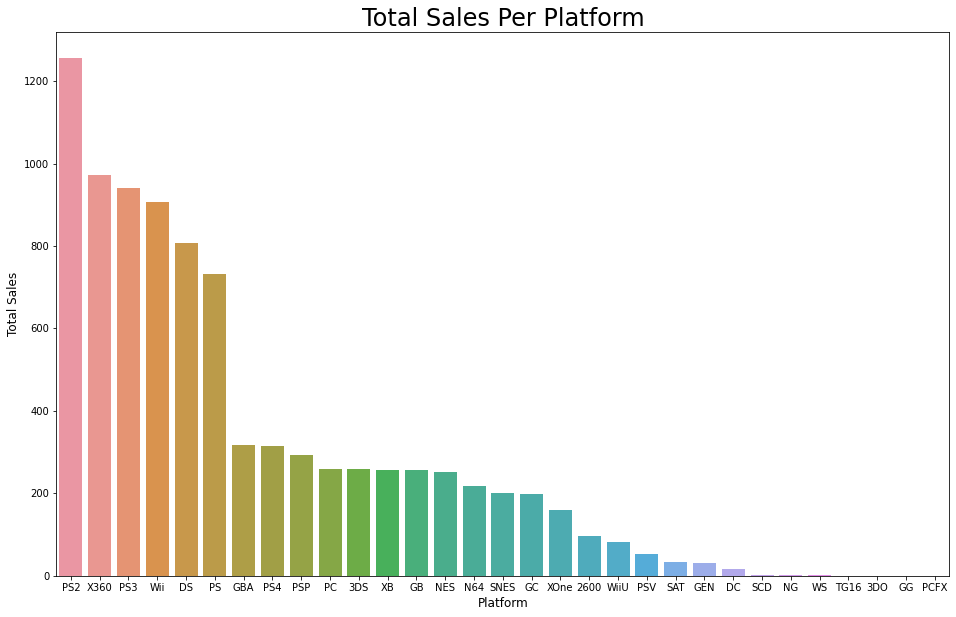

In [70]:
plt.figure(figsize=(16,10))
sns.barplot(x='platform',y="total_sales",data = platform_per_sales)
plt.title('Total Sales Per Platform', size=24)
plt.xlabel('Platform', size=12);
plt.ylabel('Total Sales', size=12);

We can see that:
* The average total sale is 286 USD millions. The Platforms which have total sale to this average are - PC , 3DS, XB, GB and NES.
* while most commun total sale is 200 USD millions. The Platforms which have total sale to this commun sale is only GC.
* Top 6 platforms are - PS2, X360, PS3, Wii, DS and PS when:
    * PS2 has the highest total sales of 1247 USD millions.
    * Then X360, PS3 and Wii have sales between 1000 to 800 USD millions.
    * and the lowest in the top 6 are DS and PS with sales between 800-700 USD millions. 
* we have 10 platforms between 600-200 USD millions and 15 platforms under 200 USD millions.

This distribution is due to the competition between platform, their progress in trchnology and popular advertisements.\
Now, let's look at the top 6 platforms and their yearly sales distribution.

#### Top 6 platfroms distribution

Our top 6 platforms are:
* PS2
* X360
* PS3
* Wii
* DS
* PS

For each platform, we will filter our data by platform and creat a new pivot tables names `PS2_sales`, `X360_sales`, `PS3`, `Wii_sales`, `DS_sales` and `PS_sales` where we sum the regional and total sales and represent a liniar distribution. 

In [71]:
PS2_sales=games.query('platform=="PS2"').pivot_table(index='year_of_release',
                                                    values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],
                                                    aggfunc='sum')
PS2_sales

,eu_sales,jp_sales,na_sales,other_sales,total_sales
year_of_release,,,,,
2000.0,10.64,8.87,16.08,3.58,39.17
2001.0,52.37,17.79,79.49,16.78,166.43
2002.0,66.41,21.85,98.00,22.10,208.36
2003.0,63.82,18.93,88.39,21.91,193.05
2004.0,56.01,19.17,96.78,39.85,211.81
2005.0,40.86,15.05,85.60,19.15,160.66
2006.0,21.87,17.79,50.26,14.32,104.24
2007.0,10.47,9.82,32.11,23.70,76.10
2008.0,7.63,5.73,21.23,19.31,53.90


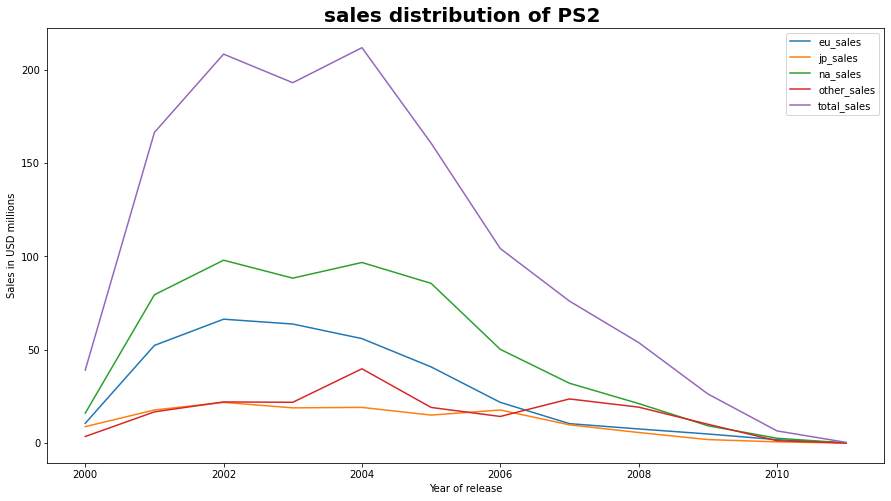

In [72]:
PS2_sales.plot(kind = 'line',figsize=(15, 8),legend = True)
plt.title('sales distribution of PS2 ', size =20, weight='bold')
plt.xlabel('Year of release')
plt.ylabel('Sales in USD millions')
plt.show()

The sales for PS2 started in 2000 until 2011. With a highest sale record between 2002 to 2004 on average in all regions. It took 2-4 years to reach the highest sales record.\
The platform has a higher sale recond in North American than in Europe, other regions and Japan (from higher to lower representatively). \
From 2005, the sales started to got down.When in 2011, the sales almost droped to 0.4 USD millions

In [73]:
X360_sales=games.query('platform=="X360"').pivot_table(index='year_of_release',
                                                    values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],
                                                    aggfunc='sum')
X360_sales

,eu_sales,jp_sales,na_sales,other_sales,total_sales
year_of_release,,,,,
2005.0,0.54,0.29,7.68,0.71,9.22
2006.0,10.86,1.20,35.30,4.43,51.79
2007.0,22.17,1.52,62.99,8.73,95.41
2008.0,38.41,1.89,82.99,12.78,136.07
2009.0,33.52,1.96,74.26,11.08,120.82
2010.0,46.42,2.11,107.75,14.27,170.55
2011.0,42.98,1.79,87.61,12.85,145.23
2012.0,32.37,1.06,58.91,8.38,100.72
2013.0,27.03,0.43,53.36,7.76,88.58


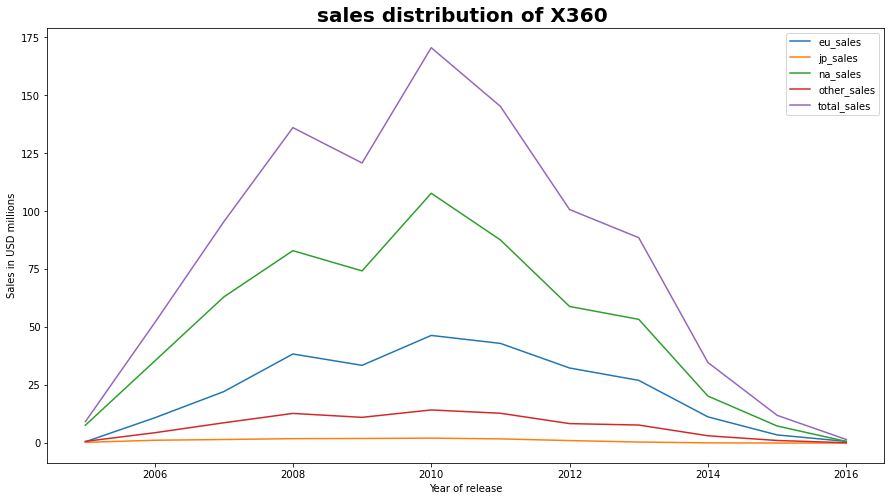

In [74]:
X360_sales.plot(kind = 'line',figsize=(15, 8),legend = True)
plt.title('sales distribution of X360 ', size =20, weight='bold')
plt.xlabel('Year of release')
plt.ylabel('Sales in USD millions')
plt.show()

The sales for X360 started from 2005 to 2016 with a higher sales record in 2010 in all regions. It took 5 years to reach the highest sales record.\
The distribution of sales between regions is the same as in PS2 - first in North America, then Europe and other regions and at last in Japan.\
After 2010, the sales of the platfrom started go down and at 2016 has less than 1.5 USD millions in total.

In [75]:
PS3_sales=games.query('platform=="PS3"').pivot_table(index='year_of_release',
                                                    values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],
                                                    aggfunc='sum')
PS3_sales

,eu_sales,jp_sales,na_sales,other_sales,total_sales
year_of_release,,,,,
2005.0,0.14,0.01,0.00,0.04,0.19
2006.0,7.86,1.08,8.84,3.66,21.44
2007.0,26.10,4.22,32.16,10.71,73.19
2008.0,38.73,5.82,57.48,16.76,118.79
2009.0,41.40,9.03,62.65,17.85,130.93
2010.0,50.59,9.96,61.51,20.90,142.96
2011.0,56.88,14.11,65.22,21.77,157.98
2012.0,39.46,11.94,40.24,16.64,108.28
2013.0,42.27,12.13,41.45,17.40,113.25


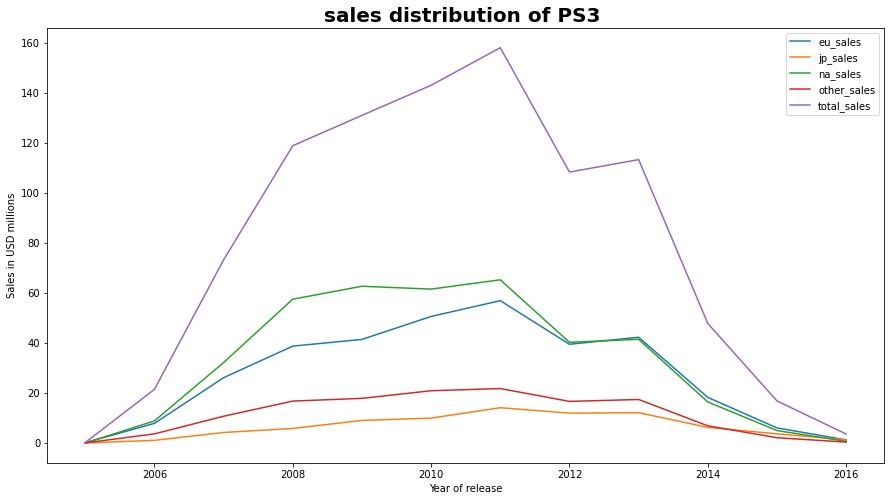

In [76]:
PS3_sales.plot(kind = 'line',figsize=(15, 8),legend = True)
plt.title('sales distribution of PS3 ', size =20, weight='bold')
plt.xlabel('Year of release')
plt.ylabel('Sales in USD millions')
plt.show()

The sales for PS3 platfrom started from 2005, after PS2 has reached his highest sales record. \
The sales of PS3 reached to his highest sales record at in 2011 in same distribution as pervious platfroms. It took 6 years to reach the highest sales record.\
Keep in mind that in the same year, the sales for PS2 droped almost to 0.4 USD millions.\
From 2011, the PS3 sales started to drop untill 2016 where it has 3.6 USD millions.

In [77]:
Wii_sales=games.query('platform=="Wii"').pivot_table(index='year_of_release',
                                                    values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],
                                                    aggfunc='sum')
Wii_sales

,eu_sales,jp_sales,na_sales,other_sales,total_sales
year_of_release,,,,,
2006.0,44.46,9.15,72.76,13.82,140.19
2007.0,44.26,12.12,83.41,13.62,153.41
2008.0,48.10,13.46,100.61,15.51,177.68
2009.0,58.31,16.57,114.55,17.54,206.97
2010.0,36.31,8.78,73.32,10.26,128.67
2011.0,17.70,5.58,31.22,5.29,59.79
2012.0,6.41,3.34,11.58,1.61,22.94
2013.0,3.34,0.05,4.48,0.72,8.59
2014.0,1.86,0.00,1.59,0.30,3.75


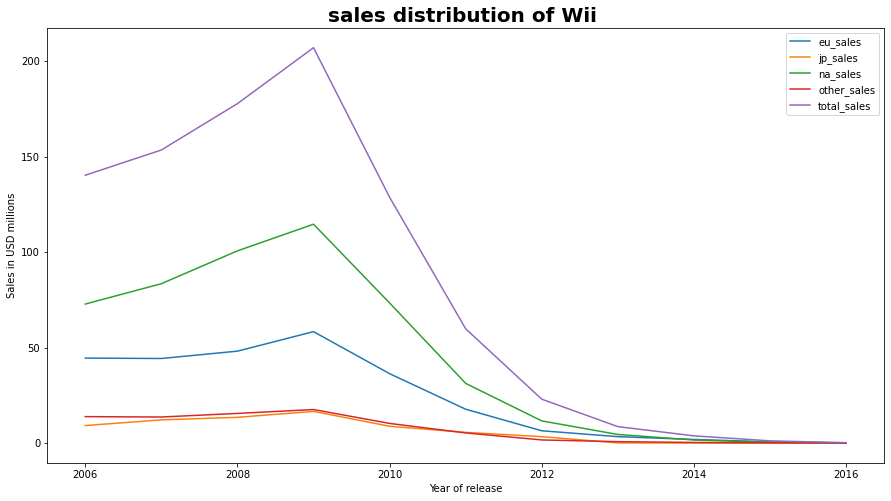

In [78]:
Wii_sales.plot(kind = 'line',figsize=(15, 8),legend = True)
plt.title('sales distribution of Wii ', size =20, weight='bold')
plt.xlabel('Year of release')
plt.ylabel('Sales in USD millions')
plt.show()

The sales for Wii started at 2006 and ended at 2016 with a highest sales records at 2009 in same region distribution as in previous platfroms.\
It reach its hightest sales recond in 4 years. And since 2009, its sales went down especially from 2014 with less than 3.4 USD millions in total.  

In [79]:
DS_sales=games.query('platform=="DS"').pivot_table(index='year_of_release',
                                                    values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],
                                                    aggfunc='sum')
DS_sales

,eu_sales,jp_sales,na_sales,other_sales,total_sales
year_of_release,,,,,
1985.0,0.00,0.02,0.00,0.00,0.02
2004.0,3.93,3.65,8.33,1.36,17.27
2005.0,41.49,29.86,47.99,10.80,130.14
2006.0,23.07,38.56,50.01,8.17,119.81
2007.0,33.80,26.81,75.51,11.11,147.23
2008.0,32.24,24.01,78.17,10.94,145.36
2009.0,25.85,24.21,60.95,8.55,119.56
2010.0,18.84,19.86,41.09,5.56,85.35
2011.0,5.72,4.32,14.40,1.89,26.33


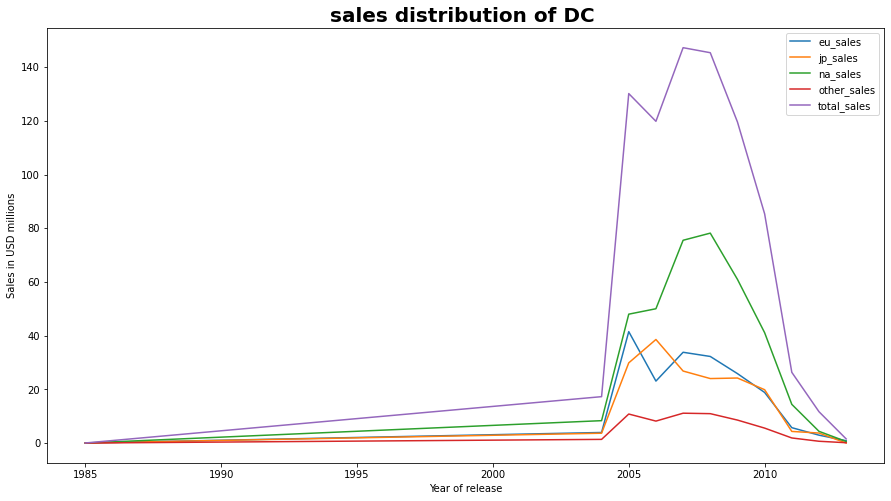

In [80]:
DS_sales.plot(kind = 'line',figsize=(15, 8),legend = True)
plt.title('sales distribution of DC ', size =20, weight='bold')
plt.xlabel('Year of release')
plt.ylabel('Sales in USD millions')
plt.show()

DC platform has a total different distributions:
* The first game in DC platfrom appeared in 1985 with a sales record only in Japan. Then disappeared until 2004
* Then it reappeared in 2004 until 2013. 
* The highest record id differs between and years. So example:
    * In North America, it reached the highest sale in 2008, 3 years after reapearing.
    * In Europe, it reached to the highest sale just in one year!
    * In Japan, it reached in 2006 only in two years! 
    * And in other regions, it styed in high sale for 4 years between 2005 (only one year since reappearing) until 2008.
* the distribution between regions is almost the same as previous with the smallest difference that Japan have higher sales than other regions. 

After reaching the high sale record, the sales of the platform started to go down until 2013 where it reache its lowest sales of less than 1.5 USD millions in total.

In [81]:
PS_sales=games.query('platform=="PS"').pivot_table(index='year_of_release',
                                                    values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],
                                                    aggfunc='sum')
PS_sales

,eu_sales,jp_sales,na_sales,other_sales,total_sales
year_of_release,,,,,
1994.0,1.20,2.67,1.76,0.40,6.03
1995.0,9.85,9.54,14.61,1.96,35.96
1996.0,25.92,17.82,45.42,5.54,94.70
1997.0,37.14,33.10,58.06,7.87,136.17
1998.0,48.74,28.48,83.22,9.05,169.49
1999.0,42.60,28.07,65.94,7.92,144.53
2000.0,30.55,14.60,45.94,5.28,96.37
2001.0,13.72,3.86,15.84,2.17,35.59
2002.0,1.89,1.64,2.78,0.36,6.67


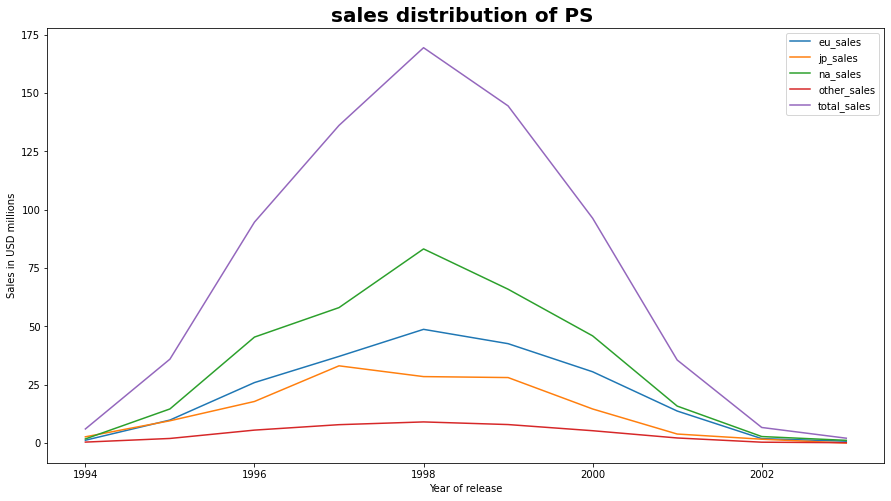

In [82]:
PS_sales.plot(kind = 'line',figsize=(15, 8),legend = True)
plt.title('sales distribution of PS ', size =20, weight='bold')
plt.xlabel('Year of release')
plt.ylabel('Sales in USD millions')
plt.show()

The PS platform appears first at 1994 until 2003. Keep in mind that in 2003, PS2 had a highest sales record in this year.\
The PS platform reached its highest record between 1998-2000 after 4 years since it appeared with the same distribution as the PS2 sales.\
After 2000, keep in mind that in this year a new version of PS was launched and the sales for PS platform started get low and at 2003 had less than 2 USD millions in total sales. 

#### Platform's lifecycle


Knowing all this information from previously research, we understand that a platform has a lifecyle - it start in specific year, reachs to high sale record, the sales downs and then dissappear in a certain year.\
Therefor, let's try to determine the platforms life spna age by creating a new dataFrame named `lifespan` grouping by platform and representing the minimum and maximun year for each platform. Then, substracting the maximun year from thr minimum and serching the average life span year of a platfrom.

In [83]:
lifespan = games.groupby(['platform']).agg({'year_of_release':['min', 'max'], 'total_sales':'sum'}).droplevel(0, axis=1).reset_index()
lifespan

,platform,min,max,sum
0,2600,1980.0,2002.0,96.98
1,3DO,1994.0,1995.0,0.10
2,3DS,2000.0,2016.0,259.00
3,DC,1998.0,2008.0,15.95
4,DS,1985.0,2013.0,806.12
5,GB,1988.0,2001.0,255.46
6,GBA,2000.0,2007.0,317.85
7,GC,2001.0,2007.0,198.93
8,GEN,1990.0,1994.0,30.77
9,GG,1992.0,1992.0,0.04


In [84]:
lifespan['life_years'] = lifespan['max'] - lifespan['min']
lifespan

,platform,min,max,sum,life_years
0,2600,1980.0,2002.0,96.98,22.0
1,3DO,1994.0,1995.0,0.10,1.0
2,3DS,2000.0,2016.0,259.00,16.0
3,DC,1998.0,2008.0,15.95,10.0
4,DS,1985.0,2013.0,806.12,28.0
5,GB,1988.0,2001.0,255.46,13.0
6,GBA,2000.0,2007.0,317.85,7.0
7,GC,2001.0,2007.0,198.93,6.0
8,GEN,1990.0,1994.0,30.77,4.0
9,GG,1992.0,1992.0,0.04,0.0


In [85]:
lifespan['life_years'].mean()

8.483870967741936

In [86]:
lifespan['life_years'].median()

8.0

It looks that on average a platform's lifespan is 8 years. And we saw in previous research, the most popolar platforms reach their popularity within 3 years since release and then their sales start to dicrease. Therefor, for the prognosis for 2017 we will slice the data between the following years - 2013 and 2016. 

###  Prognosis for 2017

#### Data slicing

As we showed in previous step, the lifespan of a game is 8 years in average when it reaches his popularity within 3 years. Therefore, we will slice our data between the folloing years 2014-2016. We will ignore the data from 2016 because it is incomplete as mentioned at the end of the introduction. The sliced date wil be stored in a new dateFrame named `prognosis_games`.

In [87]:
test1=games.query('year_of_release>=2014')

In [88]:
len(test1)/len(games)*100

10.11067903081065

In [89]:
test1.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales
count,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000
mean,2014.952663,0.168118,0.160314,0.055083,0.048320,0.431834
std,0.799724,0.446009,0.466713,0.211455,0.141748,1.055799
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,14.630000


In [90]:
test1['rating'].value_counts()

no info    749
T          271
M          266
E          219
E10+       185
Name: rating, dtype: int64

In [91]:
len(test1[(test1['rating'].isna())])/len(test1['rating'])*100

0.0

In [92]:
len(test1[(test1['critic_score'].isna())])/len(test1['critic_score'])*100

0.0

In [93]:
len(test1[(test1['user_score'].isna())])/len(test1['user_score'])*100

0.0

By slicing the data from 2014 to 20165, we will use 10.11% from all data with no missing values .

In [94]:
prognosis_games=test1
prognosis_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1,-2,no info,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,-1,-2,no info,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,-1,-2,no info,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1,-2,no info,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,-1,-2,no info,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1,-2,no info,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1,-2,no info,0.01


####  Find profitable platforms and platform prognosis

Using the data from the `prognosis_games`, let's check the platforms's total sales distribution.
Then, we will choose several plaftorms and see their behavior.

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.40
PSV,22.40
Wii,5.07


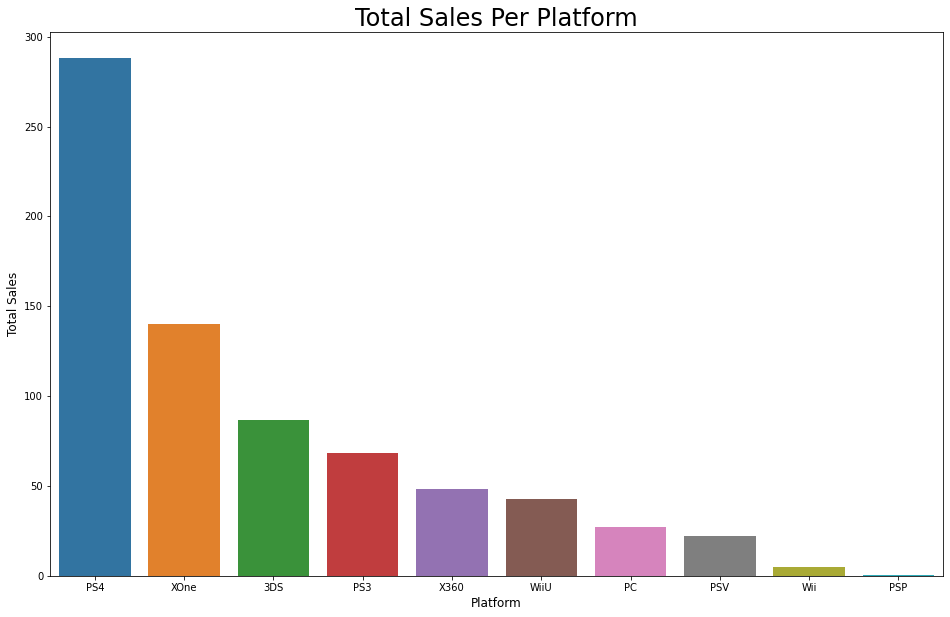

In [95]:
plt.figure(figsize=(16,10))
platforms_2009 = prognosis_games.pivot_table(index = "platform", values = "total_sales", aggfunc="sum").sort_values('total_sales', ascending=False) 
sns.barplot(x=platforms_2009.index,y="total_sales",data = platforms_2009)
plt.title('Total Sales Per Platform', size=24)
plt.xlabel('Platform', size=12);
plt.ylabel('Total Sales', size=12);
platforms_2009

Now we have a totaly different representation of the total sale. The top two platforms are PS3, X360 and Wii while PS2 has the lowest total sale.\
Let's look the yearly distribution for the next 4 platforms and their next generations: 
* PS3 and PS4,
* X360 and Xone

in the same method used in the previous steps before slicing the data.

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
Correct!</div>

##### PS3 and PS4

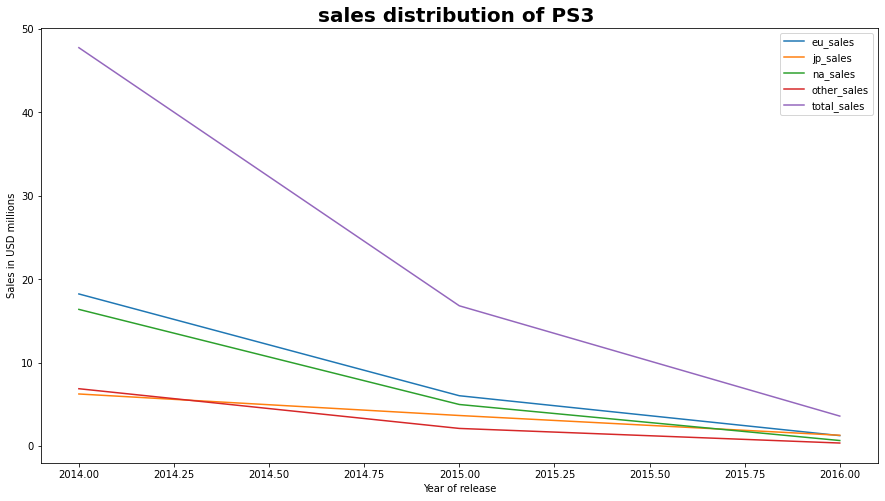

In [96]:
PS3_prognosis=prognosis_games.query('platform=="PS3"').pivot_table(index='year_of_release',
                                                    values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],
                                                    aggfunc='sum').plot(kind = 'line',figsize=(15, 8),legend = True)
plt.title('sales distribution of PS3 ', size =20, weight='bold')
plt.xlabel('Year of release')
plt.ylabel('Sales in USD millions')
plt.show()

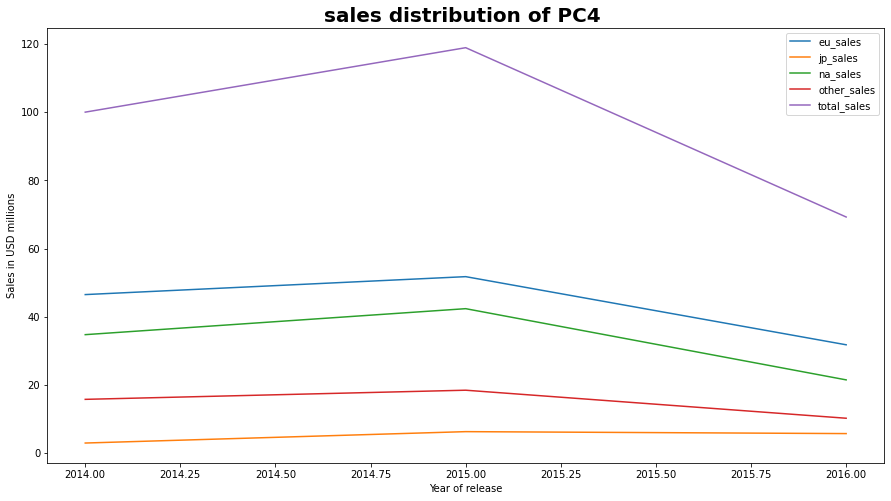

In [97]:
PS4_prognosis=prognosis_games.query('platform=="PS4"').pivot_table(index='year_of_release',
                                                    values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],
                                                    aggfunc='sum').plot(kind = 'line',figsize=(15, 8),legend = True)
plt.title('sales distribution of PC4 ', size =20, weight='bold')
plt.xlabel('Year of release')
plt.ylabel('Sales in USD millions')
plt.show()

In [98]:
prognosis_games[(prognosis_games['platform']=="PS3")][['year_of_release','na_sales','eu_sales','jp_sales','other_sales','total_sales']].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales
year_of_release,1.000000,-0.231944,-0.160750,-0.104468,-0.211340,-0.215222
na_sales,-0.231944,1.000000,0.737180,0.017355,0.928249,0.899533
eu_sales,-0.160750,0.737180,1.000000,0.025540,0.935108,0.945808
jp_sales,-0.104468,0.017355,0.025540,1.000000,0.023772,0.149133
other_sales,-0.211340,0.928249,0.935108,0.023772,1.000000,0.990464
total_sales,-0.215222,0.899533,0.945808,0.149133,0.990464,1.000000


In [99]:
prognosis_games[(prognosis_games['platform']=="PS4")][['year_of_release','na_sales','eu_sales','jp_sales','other_sales','total_sales']].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales
year_of_release,1.000000,-0.219443,-0.195176,-0.040969,-0.219129,-0.214338
na_sales,-0.219443,1.000000,0.784902,0.491452,0.944903,0.928090
eu_sales,-0.195176,0.784902,1.000000,0.472101,0.944380,0.958109
jp_sales,-0.040969,0.491452,0.472101,1.000000,0.510433,0.538524
other_sales,-0.219129,0.944903,0.944380,0.510433,1.000000,0.998252
total_sales,-0.214338,0.928090,0.958109,0.538524,0.998252,1.000000


While the sales of PS3 are dicreasing the sales of PS4 are increasing. The corralation between the sales and the year of release is a low negative relation. That means thatr this platform will be less profitable in 2017 than in 2016.

##### X360 and Xone

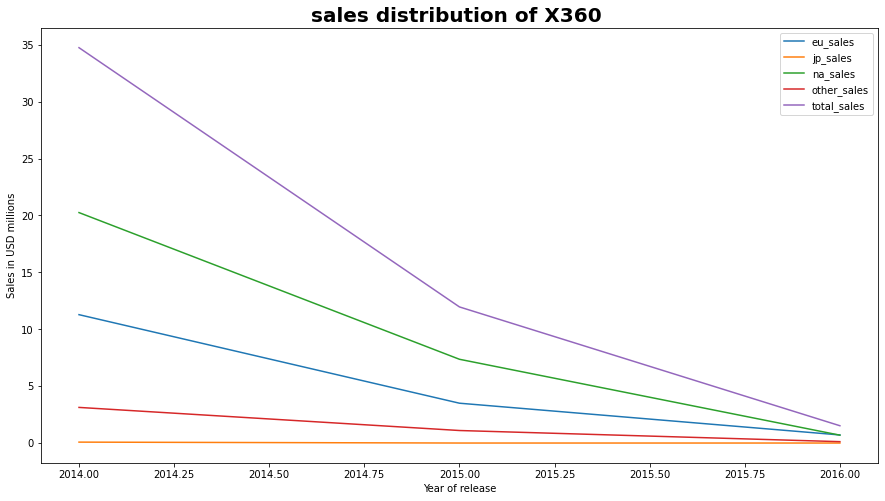

In [100]:
X360_prognosis=prognosis_games.query('platform=="X360"').pivot_table(index='year_of_release',
                                                    values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],
                                                    aggfunc='sum').plot(kind = 'line',figsize=(15, 8),legend = True)
plt.title('sales distribution of X360 ', size =20, weight='bold')
plt.xlabel('Year of release')
plt.ylabel('Sales in USD millions')
plt.show()

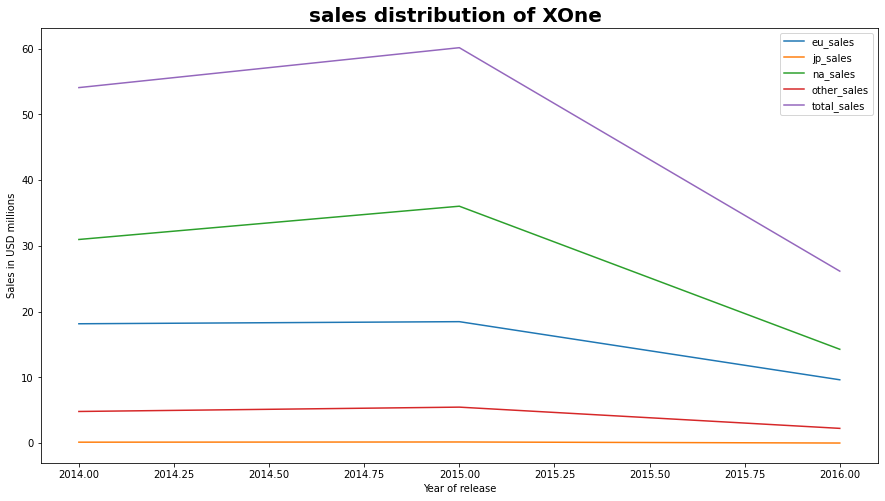

In [101]:
XOne_prognosis=prognosis_games.query('platform=="XOne"').pivot_table(index='year_of_release',
                                                    values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],
                                                    aggfunc='sum').plot(kind = 'line',figsize=(15, 8),legend = True)
plt.title('sales distribution of XOne ', size =20, weight='bold')
plt.xlabel('Year of release')
plt.ylabel('Sales in USD millions')
plt.show()

In [102]:
prognosis_games[(prognosis_games['platform']=="X360")][['year_of_release','na_sales','eu_sales','jp_sales','other_sales','total_sales']].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales
year_of_release,1.000000,-0.224167,-0.195040,-0.195843,-0.237644,-0.238375
na_sales,-0.224167,1.000000,0.588317,0.151322,0.978530,0.944965
eu_sales,-0.195040,0.588317,1.000000,0.090998,0.737452,0.820443
jp_sales,-0.195843,0.151322,0.090998,1.000000,0.154383,0.148872
other_sales,-0.237644,0.978530,0.737452,0.154383,1.000000,0.990365
total_sales,-0.238375,0.944965,0.820443,0.148872,0.990365,1.000000


In [103]:
prognosis_games[(prognosis_games['platform']=="XOne")][['year_of_release','na_sales','eu_sales','jp_sales','other_sales','total_sales']].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales
year_of_release,1.000000,-0.225464,-0.204378,-0.173475,-0.231761,-0.231327
na_sales,-0.225464,1.000000,0.763032,0.435269,0.987812,0.969688
eu_sales,-0.204378,0.763032,1.000000,0.424716,0.852089,0.897802
jp_sales,-0.173475,0.435269,0.424716,1.000000,0.450555,0.460953
other_sales,-0.231761,0.987812,0.852089,0.450555,1.000000,0.995134
total_sales,-0.231327,0.969688,0.897802,0.460953,0.995134,1.000000


The same before, while X360's sales are dicreasing the sales of XOne are increasing. The corraltionm for both platfroms are negatively low that means that the sales in 2017 will be lower than in 2016.

### Average Sales

Now we will be investigating the platform's average sale from the `prognosis_games` data.

In [104]:
prognosis_games.sort_values(by='total_sales',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1,-2,no info,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,-1,-2,no info,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,-1,-2,no info,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16264,Worms: WMD,XOne,2016.0,Action,0.01,0.00,0.00,0.00,75.0,8.1,E10+,0.01
16267,The Book of Unwritten Tales 2,WiiU,2016.0,Adventure,0.00,0.01,0.00,0.00,-1,-2,T,0.01
16270,Hyakka Yakou,PSV,2015.0,Action,0.00,0.00,0.01,0.00,-1,-2,no info,0.01
16276,Sangoku Koi Senki: Omoide Gaeshi - CS Edition,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1,-2,no info,0.01


In [105]:
prognosis_games['total_sales'].describe()

count    1690.000000
mean        0.431834
std         1.055799
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

In [106]:
prognosis_games.pivot_table(index='platform',values='total_sales',aggfunc='sum').reset_index().sort_values(by='total_sales',ascending=False).head(5)

,platform,total_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22


We clearly can we that we will have upper outliers because the difference between 75% to max value is 31 USD millions.

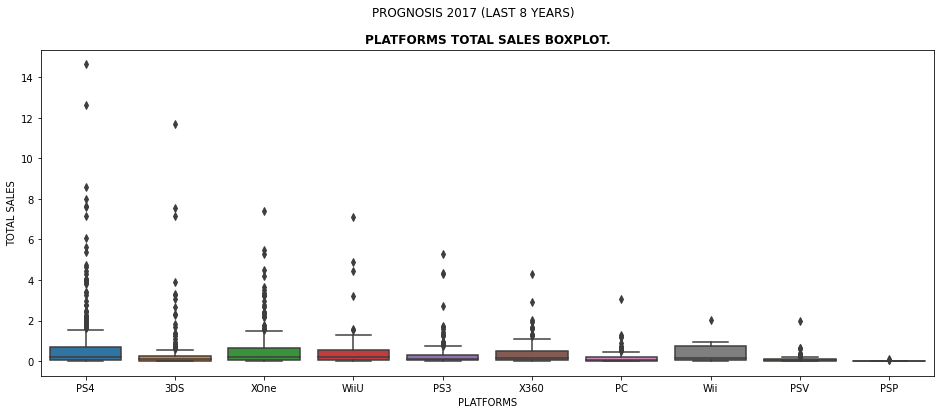

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1,-2,no info,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,-1,-2,no info,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,-1,-2,no info,7.98


In [107]:
plt.figure(figsize = (16,6))
sns.boxplot(data = prognosis_games, x = 'platform', y = 'total_sales')
plt.suptitle('PROGNOSIS 2017 (LAST 8 YEARS)')
plt.title('PLATFORMS TOTAL SALES BOXPLOT.', weight='bold')
plt.xlabel('PLATFORMS')
plt.ylabel('TOTAL SALES')
plt.show()
prognosis_games.head(5)

Let's try to filtere the `prognosis_games` table where the total sales are equal or lower than 1.4 USD millions.

count    1570.000000
mean        0.205478
std         0.279916
min         0.010000
25%         0.030000
50%         0.080000
75%         0.250000
max         1.380000
Name: total_sales, dtype: float64


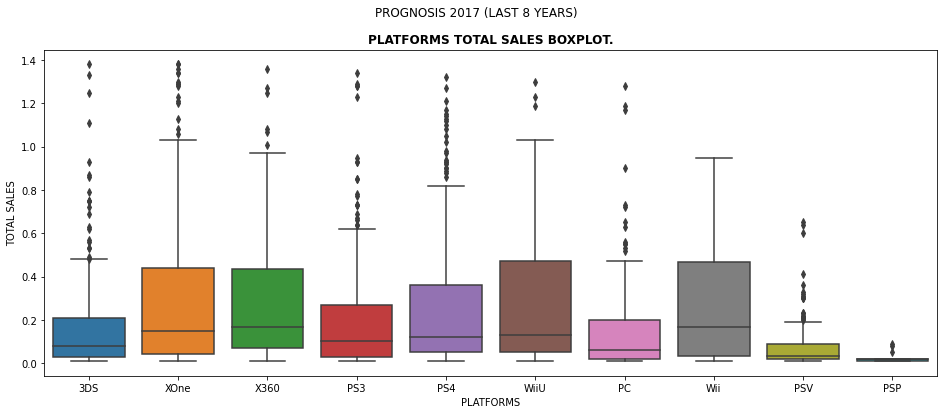

,platform,total_sales
3,PS4,81.04
9,XOne,59.91
2,PS3,45.07
0,3DS,35.96
8,X360,32.15


In [108]:
filtered_prognosis=prognosis_games.query('total_sales<1.4').sort_values(by='total_sales',ascending=False)
print(filtered_prognosis['total_sales'].describe())
plt.figure(figsize = (16,6))
sns.boxplot(data = filtered_prognosis, x = 'platform', y = 'total_sales')
plt.suptitle('PROGNOSIS 2017 (LAST 8 YEARS)')
plt.title('PLATFORMS TOTAL SALES BOXPLOT.', weight='bold')
plt.xlabel('PLATFORMS')
plt.ylabel('TOTAL SALES')
plt.show()
filtered_prognosis.query('total_sales<1.5').pivot_table(index='platform',values='total_sales',aggfunc='sum').reset_index().sort_values(by='total_sales',ascending=False).head(5)

After filtering the upper outliers, we can see much clearlier that:
* the Wii, WiiU and Xbox (X360 and Xone) platforms have the highest average sale which looks like more than 0.2 USD millions and which more than the median sale  
* those same platfroms have higher outliers than others platforms. That means they have a larger profit range.

Now let's move on and look the scoring and the rating of the paltfroms and how they affect on sales.

### User and Professional reviews and their affect sales

From previous step, we will choose to look at the correlation of critic's and user's score on regional and total sales of the following platfroms - PS3, PS4 and X360 by building a scatter plot.

#### PS3

In [109]:
PS3_reviews = prognosis_games.query('platform=="PS3"')
PS3_reviews=PS3_reviews.query('critic_score!="unknown"')
PS3_reviews=PS3_reviews.query('user_score!="unknown"')
PS3_reviews['critic_score']=PS3_reviews['critic_score'].astype('float')
PS3_reviews['user_score']=PS3_reviews['user_score'].astype('float')
PS3_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 180 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             219 non-null    object 
 1   platform         219 non-null    object 
 2   year_of_release  219 non-null    float64
 3   genre            219 non-null    object 
 4   na_sales         219 non-null    float64
 5   eu_sales         219 non-null    float64
 6   jp_sales         219 non-null    float64
 7   other_sales      219 non-null    float64
 8   critic_score     219 non-null    float64
 9   user_score       219 non-null    float64
 10  rating           219 non-null    object 
 11  total_sales      219 non-null    float64
dtypes: float64(8), object(4)
memory usage: 22.2+ KB


In [110]:
PS3_cor=PS3_reviews[['na_sales','eu_sales','jp_sales','other_sales','total_sales','user_score','critic_score']].corr()
PS3_cor

,na_sales,eu_sales,jp_sales,other_sales,total_sales,user_score,critic_score
na_sales,1.000000,0.737180,0.017355,0.928249,0.899533,0.228826,0.048120
eu_sales,0.737180,1.000000,0.025540,0.935108,0.945808,0.174307,-0.002445
jp_sales,0.017355,0.025540,1.000000,0.023772,0.149133,0.053682,0.027706
other_sales,0.928249,0.935108,0.023772,1.000000,0.990464,0.215548,0.025685
total_sales,0.899533,0.945808,0.149133,0.990464,1.000000,0.215550,0.023612
user_score,0.228826,0.174307,0.053682,0.215548,0.215550,1.000000,0.516430
critic_score,0.048120,-0.002445,0.027706,0.025685,0.023612,0.516430,1.000000


In [ ]:
sns.pairplot(PS3_cor[['na_sales','eu_sales','jp_sales','other_sales','total_sales','user_score','critic_score']], height=3)

We can say that the user score have a positive influence on the sales in North America, Japan and other regions while a negative influence in the sales in Europe. \
On the contrary, the critic score have a high posotive influence in all regions.\
That means the user score may dicrease the sale while the critic score can make the sales go higher.

#### PS4 

In [ ]:
PS4_reviews = prognosis_games.query('platform=="PS4"')
PS4_reviews=PS4_reviews.query('critic_score!="unknown"')
PS4_reviews=PS4_reviews.query('user_score!="unknown"')
PS4_reviews['critic_score']=PS4_reviews['critic_score'].astype('float')
PS4_reviews['user_score']=PS4_reviews['user_score'].astype('float')
PS4_reviews.info()

In [ ]:
PS4_cor = PS4_reviews[['na_sales','eu_sales','jp_sales','other_sales','total_sales','user_score','critic_score']].corr()
PS4_cor

In [ ]:
sns.pairplot(PS4_cor[['na_sales','eu_sales','jp_sales','other_sales','total_sales','user_score','critic_score']], height=3)

In this case, the user score have a positive influence on the sale in all regions while in Japan, it has a negative influence.\
And the critic score has as previously a positive influence on the sale almost equally in all regions except in Japan where it is lower.

#### X360 

In [ ]:
X360_reviews = prognosis_games.query('platform=="X360"')
X360_reviews=X360_reviews.query('critic_score!="unknown"')
X360_reviews=X360_reviews.query('user_score!="unknown"')
X360_reviews['critic_score']=X360_reviews['critic_score'].astype('float')
X360_reviews['user_score']=X360_reviews['user_score'].astype('float')
X360_reviews.info()

In [ ]:
X360_cor = X360_reviews[['na_sales','eu_sales','jp_sales','other_sales','total_sales','user_score','critic_score']].corr()
X360_cor

In [ ]:
sns.pairplot(X360_cor[['na_sales','eu_sales','jp_sales','other_sales','total_sales','user_score','critic_score']], height=3)

The user score has a positive infuence on the sales in all regions.
And as in previous platfroms, the critic score has a positive influence on the sales except in North America.

### Same games's sale in different platforms

Now, let's take a look at the top 2 games from the `prognosis_games` and see their sale distribution through different platfroms.

In [ ]:
top_game  = prognosis_games.pivot_table(index='name',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False)
top_game.head(10)

The top 2 games are:
* `Call of Duty: Black Ops 3` with total sale of 25.67 USD millions.
* `Grand Theft Auto V` which has 19.26 USD millions.

We will take another game `FIFA 15`which has total sales of 17.37 USD millioms just in case to make a better comparble stats.

In [ ]:
top1_game = prognosis_games.query('name=="Call of Duty: Black Ops 3"').pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False).reset_index()
top1_game

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x='platform',y="total_sales",data = top1_game)
plt.title('Total Sales Per Platform', size=24)
plt.xlabel('Platform', size=12);
plt.ylabel('Total Sales', size=12);

In [ ]:
top2_game = prognosis_games.query('name=="Grand Theft Auto V"').pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False).reset_index()
top2_game

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x='platform',y="total_sales",data = top2_game)
plt.title('Total Sales Per Platform', size=24)
plt.xlabel('Platform', size=12);
plt.ylabel('Total Sales', size=12);

In [ ]:
top3_game = prognosis_games.query('name=="FIFA 15"').pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False).reset_index()
top3_game

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x='platform',y="total_sales",data = top3_game)
plt.title('Total Sales Per Platform', size=24)
plt.xlabel('Platform', size=12);
plt.ylabel('Total Sales', size=12);

We can conclude that Playstation and Xbox platforms have are still the most profitable platforms.

### Profitable genre's game

To analyze this information, we will use the data from `prognosis_games` and search for the most and the least profitable genres.

In [ ]:
prognosis_games.pivot_table(index='genre',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False)


The most profitable genre is Action with total sales of 199.71 USD millions and the second is Shooter with total sales of 170.94 USD millions.\
The least profitale genres are Strategy with total sale of 3.96 USD miilionds and Puzzles with total sales of 2.21 USD millions \
Let's look at the ditribution of their sales through different platforms.

In [ ]:
action_sales=prognosis_games.query('genre=="Action"').pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False)
action_sales

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x=action_sales.index,y="total_sales",data = action_sales)
plt.title('Total Sales For Action genre', size=24)
plt.xlabel('Platform', size=12);
plt.ylabel('Total Sales in USD milllions', size=12);
plt.show()

In [ ]:
shooters_sales=prognosis_games.query('genre=="Shooter"').pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False)
print(shooters_sales)
plt.figure(figsize=(16,10))
sns.barplot(x=shooters_sales.index,y="total_sales",data = shooters_sales)
plt.title('Total Sales For Action genre', size=24)
plt.xlabel('Platform', size=12);
plt.ylabel('Total Sales in USD milllions', size=12);
plt.show()

In [ ]:
Strategy_sales=prognosis_games.query('genre=="Strategy"').pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False)
print(Strategy_sales)
plt.figure(figsize=(16,10))
sns.barplot(x=Strategy_sales.index,y="total_sales",data = Strategy_sales)
plt.title('Total Sales For Action genre', size=24)
plt.xlabel('Platform', size=12);
plt.ylabel('Total Sales in USD milllions', size=12);
plt.show()

In [ ]:
Puzzle_sales=prognosis_games.query('genre=="Puzzle"').pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False)
print(Puzzle_sales.T)
plt.figure(figsize=(16,10))
sns.barplot(x=Puzzle_sales.index,y="total_sales",data = Puzzle_sales)
plt.title('Total Sales For Action genre', size=24)
plt.xlabel('Platform', size=12);
plt.ylabel('Total Sales in USD milllions', size=12);
plt.show()

For most profitable genre, the platforms witht the highest sale are still XOne and PS4. While in the least profitable genre, the platforms are platforms whose sales rating are already low like PC, and WiiU. 

## User profile per region

For each region North America, Europe and Japan, we will determine the following:
* The top five platforms and will describe variations in their market shares from region to region.
* The top five genres and explain the difference.
* Do ESRB ratings affect sales in individual regions?

### Top five platforms

In [ ]:
na_top_5_plat=prognosis_games.pivot_table(index='platform',values='na_sales',aggfunc='sum').reset_index().sort_values(by='na_sales',ascending=False)
others_na_sales = na_top_5_plat.loc[4:,'na_sales'].sum()
na_top_5_plat = na_top_5_plat[0:4].append({'platform':'others', 'na_sales':others_na_sales}, ignore_index=True)
na_top_5_plat = na_top_5_plat.sort_values(by='na_sales', ascending = False).reset_index(drop=True)
na_top_5_plat

In [ ]:
eu_top_5_plat=prognosis_games.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index()
others_eu_sales = eu_top_5_plat.loc[4:,'eu_sales'].sum()
eu_top_5_plat = eu_top_5_plat[0:4].append({'platform':'others', 'eu_sales':others_eu_sales}, ignore_index=True)
eu_top_5_plat=eu_top_5_plat[0:5]
eu_top_5_plat

In [ ]:
jp_top_5_plat=prognosis_games.pivot_table(index='platform',values='jp_sales',aggfunc='sum').reset_index().sort_values(by='jp_sales',ascending=False)
others_jp_sales = jp_top_5_plat.loc[4:,'jp_sales'].sum()
jp_top_5_plat = jp_top_5_plat[0:4].append({'platform':'others', 'jp_sales':others_jp_sales}, ignore_index=True)
jp_top_5_plat=jp_top_5_plat[0:5]
jp_top_5_plat

In [ ]:
(na_top_5_plat.set_index('platform')
                .plot(y='na_sales', kind='pie', 
                      title = 'NA Top Platforms, Sales', 
                      figsize=(6, 6), autopct='%1.1f%%', shadow=True)
);
(eu_top_5_plat.set_index('platform')
                .plot(y='eu_sales', kind='pie', 
                      title = 'EU Top Platforms, Sales', 
                      figsize=(6, 6), autopct='%1.1f%%', shadow=True)
);
(jp_top_5_plat.set_index('platform')
                .plot(y='jp_sales', kind='pie', 
                      title = 'JP Top Platforms, Sales', 
                      figsize=(6, 6), autopct='%1.1f%%', shadow=True)
);

In North America, the most profitable platform is PS4 with 42.7%. In Europe, PS4 is the most profitale with 48.0%. And in Japan, the most profitable is 3DS with 51.6%. 

### The top five genres

In [ ]:
na_top_5_genre=prognosis_games.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).reset_index()
others_na_genre = na_top_5_genre.loc[4:,'na_sales'].sum()
na_top_5_genre = na_top_5_genre[0:4].append({'genre':'others', 'na_sales':others_na_genre}, ignore_index=True)
na_top_5_genre

In [ ]:
eu_top_5_genre=prognosis_games.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index()
others_eu_genre = eu_top_5_genre.loc[4:,'eu_sales'].sum()
eu_top_5_genre = eu_top_5_genre[0:4].append({'genre':'others', 'eu_sales':others_eu_genre}, ignore_index=True)
eu_top_5_genre

In [ ]:
jp_top_5_genre=prognosis_games.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).reset_index()
others_jp_genre = jp_top_5_genre.loc[4:,'jp_sales'].sum()
jp_top_5_genre = jp_top_5_genre[0:4].append({'genre':'others', 'jp_sales':others_jp_genre}, ignore_index=True)
jp_top_5_genre

In [ ]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(15, 15)) 

labels = na_top_5_genre['genre']
values = na_top_5_genre['na_sales']
ax1.pie(values,labels = labels,autopct = '%1.1f%%',shadow=True, startangle=90)
ax1.set_title('Top 5 Genre for North America Region')

labels = eu_top_5_genre['genre']
values = eu_top_5_genre['eu_sales']
ax2.pie(values,labels = labels,autopct = '%1.1f%%',shadow=True, startangle=90)
ax2.set_title('Top 5 Genre for Europe Region')

labels = jp_top_5_genre['genre']
values = jp_top_5_genre['jp_sales']
ax3.pie(values,labels = labels,autopct = '%1.1f%%',shadow=True, startangle=90)
ax3.set_title('Top 5 Genre for Japan Region')


fig.show()

The most profitable genre in North America is Shooter (27.8%), in Europe is Action (27.7%) is Action while in Japan, the most profitable genre is Role-Playing (33.9%)

### ESRB ratings effect on sales

In [ ]:
na_top_5_rating=prognosis_games.pivot_table(index='rating',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).reset_index()
na_top_5_rating

In [ ]:
eu_top_5_rating=prognosis_games.pivot_table(index='rating',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index()
eu_top_5_rating

In [ ]:
jp_top_5_rating=prognosis_games.pivot_table(index='rating',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).reset_index()
jp_top_5_rating

In [ ]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(15, 15)) 

labels = na_top_5_rating['rating']
values = na_top_5_rating['na_sales']
ax1.pie(values,labels = labels,autopct = '%1.1f%%',shadow=True, startangle=90)
ax1.set_title('Top 5 Rating for North America Region')

labels = eu_top_5_rating['rating']
values = eu_top_5_rating['eu_sales']
ax2.pie(values,labels = labels,autopct = '%1.1f%%',shadow=True, startangle=90)
ax2.set_title('Top 5 Genre for Europe Region')

labels = jp_top_5_rating['rating']
values = jp_top_5_rating['jp_sales']
ax3.pie(values,labels = labels,autopct = '%1.1f%%',shadow=True, startangle=90)
ax3.set_title('Top 5 Genre for Japan Region')


fig.show()

In North America (34.0%) and in Europe (34.6%), M known as Mature raing have the highest sales. While in Japan, the unknowm rating has the highest sales of 61.154.6% of the data and the next ESRB rating is T known as Teen woth 15.9%.

##  Test the following hypotheses:

And finelly we need to test the followinf hypthesis and their null and alternative hypothesis are:
1. Average user ratings of the Xbox One and PC platforms are the same.
    * H0 (null hypothesis) - the user's score for Xbox and Pc platforms are the same.
    * H1 (alterenative hypothesis) - the user's score for Xbox and PC are different .
2. Average user ratings for the Action and Sports genres are different.
    * H0 (null hypothesis) - the user's score for Action and Sports genre are the same.
    * H1 (alterenative hypothesis) - he user's score for Action and Sports genre are different. 


In [ ]:
def t_test(sample1,sample2,alpha=0.05):
    p_value_levene=stats.levene(sample1, sample2).pvalue
    if p_value_levene<alpha:
        option_var=False
    else:
        option_var=True
    p_value=stats.ttest_ind(sample1, sample2,nan_policy='omit',equal_var=option_var).pvalue
    print(p_value)
    if p_value<alpha:
        print('Reject H0 and accept H1')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 and sample 2 are not the same or insufficient evidence to support H1") 

### Average user ratings of the Xbox One and PC platforms are the same.

In [ ]:
prognosis_games['user_score']=prognosis_games['user_score'].astype(float)
XOne_rating = prognosis_games.query('platform == "XOne"')
XOne_rating = XOne_rating['user_score']
XOne_rating.mean()

In [ ]:
PC_rating = prognosis_games.query('platform == "PC"')
PC_rating = PC_rating['user_score']
PC_rating.mean()

The mean look the same. Let's set the alpha to 0.05 and preform a t-test.

In [ ]:
t_test(XOne_rating,PC_rating,alpha=0.05)

### Average user ratings for the Action and Sports genres are different.

In [ ]:
actions_rating = prognosis_games.query('genre =="Action"')
actions_rating = actions_rating['user_score']
actions_rating.mean()

In [ ]:
sports_rating = prognosis_games.query('genre == "Sports"')
sports_rating = sports_rating['user_score']
sports_rating .mean()

In [ ]:
t_test(actions_rating,sports_rating,alpha=0.05)

## Write a general conclusion

The steps we did in this project are:
* Prepared the raw data - 
    * coverted the column names into lowercase.
    * Filled the missing values by most commun values grouped by game's name  in the following columns - `name`, `year_of_release`, `critic_score`, `user_score` and `rating`.
    * Found a correlation between the missing values in `critic_score`, `user_score` and `rating` that can be due to old games or too new games.
    * add a new column of `total_sales`.
* In the prepared data, we found:
    * 4 periods of year where sales dispersted defferantly which is due to the development of the technology.
    * we used this information to prognosis for 2017 -
        * that most profitable platforms in all year are PlayStatio and Xbox who launched every bunch of years a new version of the platform. 
        * Platform's lifespan is on average 8 years when after 2-4 first reachs to a high popularity and then sales drop almmost to 0 in 4-6 years.
        * the critic score has a positice influence on the sales in all regions. While the user's score depends on regions.  
        * the most profitable genre in North America and Europe is Action and Shooting while in Japan is Role-Playing.
        * the profitable EDRB rating in North America and Europe is M (Mature) and in Japan is E (Everyone).
* we tested two hypothsis and their results are: 
    * We can not day that the average user scoring of Xbox one and PC platformds are the same and do not have enough evidence that they are different.
    * We had reject the null hypothesid the average user score for Action and shooting are the same and therefor, accpeted that they are different.
    

We highly recommand creating and advertising new games for the Xbox and Playstion platfroms of the Action and Shooting genre in North America and Europe marcket.